In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
uri='https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/corected_timedelay-correlation.csv'
df1=pd.read_csv(uri)
df1.Date=pd.to_datetime(df1.Date)
df1.set_index('Date', inplace=True)
df1.head(1)

,SymH,Density,ap60,F107,MgII
Date,,,,,
2018-05-29,13,1.990000e-14,5,76.6,0.274551


In [ ]:
y = np.array(df1['Density']*1e12).reshape(-1, 1)
Y = y.reshape(-1)

x1 = np.array(df1['SymH']).reshape(-1, 1)
X1 = x1.reshape(-1)

x2 = np.array(df1['ap60']).reshape(-1, 1)
X2 = x2.reshape(-1)

x3 = np.array(df1['F107']).reshape(-1, 1)
X3 = x3.reshape(-1)

x4 = np.array(df1['MgII']).reshape(-1, 1)
X4 = x4.reshape(-1)

In [ ]:
linear_SymH = np.poly1d(np.polyfit(X1, Y, 1))
quadratic_SymH = np.poly1d(np.polyfit(X1, Y, 2))
line_SymH = np.linspace(X1.min(), X1.max())

linear_ap60 = np.poly1d(np.polyfit(X2, Y, 1))
quadratic_ap60 = np.poly1d(np.polyfit(X2, Y, 2))
line_ap60 = np.linspace(X2.min(), X2.max())

linear_F107 = np.poly1d(np.polyfit(X3, Y, 1))
quadratic_F107 = np.poly1d(np.polyfit(X3, Y, 2))
line_F107 = np.linspace(X3.min(), X3.max())

linear_MgII = np.poly1d(np.polyfit(X4, Y, 1))
quadratic_MgII = np.poly1d(np.polyfit(X4, Y, 2))
line_MgII = np.linspace(X4.min(), X4.max())

In [ ]:
corr1 = np.corrcoef(df1['SymH'], df1['Density'])[1,0]
corr2 = np.corrcoef(df1['ap60'], df1['Density'])[1,0]
corr3 = np.corrcoef(df1['F107'], df1['Density'])[1,0]
corr4 = np.corrcoef(df1['MgII'], df1['Density'])[1,0]

corr1_2 = np.corrcoef(df1['SymH']**2, df1['Density'])[1,0]
corr2_2 = np.corrcoef(df1['ap60']**2, df1['Density'])[1,0]
corr3_2 = np.corrcoef(df1['F107']**2, df1['Density'])[1,0]
corr4_2 = np.corrcoef(df1['MgII']**2, df1['Density'])[1,0]

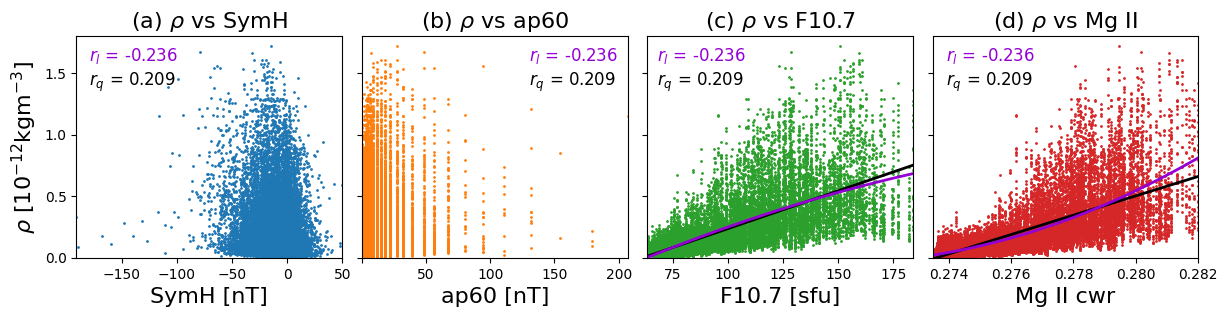

In [ ]:
fig, ((ax_SymH), (ax_ap60), (ax_F107), (ax_MgII)) = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

ax_SymH.scatter(df1['SymH'], df1['Density']*1e12,s = 1, color ='tab:blue')

ax_SymH.set_ylim(0,1.8)
ax_SymH.set_xlabel("SymH [nT]", size=16)
ax_SymH.set_ylabel(r'$\rho$' " [$\mathregular{10^{-12} kgm^{-3}}$]", size=16)
ax_SymH.set_title('(a) ' r'$\rho$' " vs SymH", size=16)

ax_ap60.scatter(df1['ap60'], df1['Density']*1e12,s = 1, color ='tab:orange')

ax_ap60.set_ylim(0,1.8)
plt.setp(ax_ap60.get_xticklabels()[0], visible=False)
ax_ap60.set_xlabel("ap60 [nT]", size=16)
ax_ap60.set_title('(b) ' r'$\rho$' " vs ap60", size=16)

ax_F107.scatter(df1['F107'], df1['Density']*1e12,s = 1, color ='tab:green')
ax_F107.plot(line_F107, linear_F107(line_F107), linewidth = '2', color = 'black')
ax_F107.plot(line_F107, quadratic_F107(line_F107), linewidth = '2', color = 'darkviolet')
ax_F107.set_ylim(0,1.8)
ax_F107.set_xlabel("F10.7 [sfu]", size=16)
ax_F107.set_title('(c) ' r'$\rho$' " vs F10.7", size=16)

ax_MgII.scatter(df1['MgII'], df1['Density']*1e12,s = 1, color ='tab:red')
ax_MgII.plot(line_MgII, linear_MgII(line_MgII), linewidth = '2', color = 'black')
ax_MgII.plot(line_MgII, quadratic_MgII(line_MgII), linewidth = '2', color = 'darkviolet')
ax_MgII.set_ylim(0,1.8)
ax_MgII.set_xlabel("Mg II cwr", size=16)
ax_MgII.set_title('(d) ' r'$\rho$' " vs Mg II", size=16)

ax_SymH.text(-180, 1.6, r'$r_{l}$'+' = {:.3f}'.format(corr1), size=12, color = 'darkviolet')
ax_SymH.text(-180, 1.4, r'$r_{q}$'+' = {:.3f}'.format(corr1_2), size=12, color = 'black')
ax_ap60.text(130, 1.6, r'$r_{l}$'+' = {:.3f}'.format(corr1), size=12, color = 'darkviolet')
ax_ap60.text(130, 1.4, r'$r_{q}$'+' = {:.3f}'.format(corr1_2), size=12, color = 'black')
ax_F107.text(68, 1.6, r'$r_{l}$'+' = {:.3f}'.format(corr1), size=12, color = 'darkviolet')
ax_F107.text(68, 1.4, r'$r_{q}$'+' = {:.3f}'.format(corr1_2), size=12, color = 'black')
ax_MgII.text(0.2739, 1.6, r'$r_{l}$'+' = {:.3f}'.format(corr1), size=12, color = 'darkviolet')
ax_MgII.text(0.2739, 1.4, r'$r_{q}$'+' = {:.3f}'.format(corr1_2), size=12, color = 'black')

ax_SymH.margins(0, 0.1)
ax_ap60.margins(0, 0.1)
ax_F107.margins(0, 0.1)
ax_MgII.margins(0, 0.1)
plt.tight_layout(pad = 0.1)
plt.show()

Additional calculations for discussion

In [ ]:
Minimum = df1.loc['2018-05-29':'2020-09-15']
Rising = df1.loc['2020-09-16':'2022-12-25']
CME = df1.loc['2019-05-11':'2019-05-20']
SIR = df1.loc['2019-08-29':'2019-09-07']
Quiet = df1.loc['2020-03-08':'2020-03-17']
CME_CME = df1.loc['2022-01-31':'2022-02-09']

In [ ]:
corrWhole = np.corrcoef(df1['SymH'], df1['Density'])[1,0]
corrMinimum = np.corrcoef(Minimum['SymH'], Minimum['Density'])[1,0]
corrRising = np.corrcoef(Rising['SymH'], Rising['Density'])[1,0]

print('Correlation SymH vs Density')
print(f'Whole = {corrWhole:.3f}')
print(f'Minimum Phase = {corrMinimum:.3f}')
print(f'Rising Phase = {corrRising:.3f}')

Correlation SymH vs Density
Whole = -0.236
Minimum Phase = -0.333
Rising Phase = -0.234


In [ ]:
corrCME = np.corrcoef(CME['SymH'], CME['ap60'])[1,0]
corrSIR = np.corrcoef(SIR['SymH'], SIR['ap60'])[1,0]
corrQuiet = np.corrcoef(Quiet['SymH'], Quiet['ap60'])[1,0]
corrCME_CME = np.corrcoef(CME_CME['SymH'], CME_CME['ap60'])[1,0]

print('Correlation SymH vs ap60')
print(f'CME = {corrCME:.3f}')
print(f'SIR = {corrSIR:.3f}')
print(f'Quiet = {corrQuiet:.3f}')
print(f'CME-CME = {corrCME_CME:.3f}')

Correlation SymH vs ap60
CME = -0.555
SIR = -0.601
Quiet = -0.265
CME-CME = -0.690


In [ ]:
corrWhole = np.corrcoef(df1['SymH'], df1['ap60'])[1,0]
corrMinimum = np.corrcoef(Minimum['SymH'], Minimum['ap60'])[1,0]
corrRising = np.corrcoef(Rising['SymH'], Rising['ap60'])[1,0]

print('Correlation SymH vs ap60')
print(f'Whole = {corrWhole:.3f}')
print(f'Minimum Phase = {corrMinimum:.3f}')
print(f'Rising Phase = {corrRising:.3f}')

Correlation SymH vs ap60
Whole = -0.521
Minimum Phase = -0.516
Rising Phase = -0.515


In [ ]:
corrCME = np.corrcoef(CME['SymH'], CME['Density'])[1,0]
corrSIR = np.corrcoef(SIR['SymH'], SIR['Density'])[1,0]
corrQuiet = np.corrcoef(Quiet['SymH'], Quiet['Density'])[1,0]
corrCME_CME = np.corrcoef(CME_CME['SymH'], CME_CME['Density'])[1,0]

print('Correlation SymH vs Density')
print(f'CME = {corrCME:.3f}')
print(f'SIR = {corrSIR:.3f}')
print(f'Quiet = {corrQuiet:.3f}')
print(f'CME-CME = {corrCME_CME:.3f}')

Correlation SymH vs Density
CME = -0.574
SIR = -0.471
Quiet = -0.144
CME-CME = -0.596
